In [86]:
import numpy as np
import matplotlib.pyplot as plt
from Levenberg_Marquardt_yq import Levenberg_Marquardt_yq
from GaussNewton_line import GaussNewton_line_md
from newton import newton_md
from Levenberg_Marquardt import Levenberg_Marquardt

## 1. Pwell's problem

## 3. Implement a Matlab function to calculate r and J with a given x.

In [87]:
def fun_rJ_exe(x):
   def r(x):
       return np.array([x[0], 10*x[0]/(x[0]+0.1) + 2*x[1]**2])

   def J(x):
      return np.array([[1, 0], [10/(x[0]+0.1) - 10*x[0]/(x[0]+0.1)**2, 4*x[1]]])

   return r(x), J(x)

# 4. Newton's method

## a) If the Jacobian J is not a square matrix, then can we still apply Newton’smethod?
If the Jacobian is not a square matrix, then you cannot directly apply Newton's method as it is formulated. The reason is that Newton's method involves forming the inverse of the Jacobian matrix, which is only defined for square matrices. If the Jacobian is not square, then its inverse is not defined, and the method cannot proceed.

## b) Revise your implementation of Newton’s method for solving a minimiza-tion problem minxf(x), newton, to solve the nonlinear system (3) with the newton iteration step given in (4). Set the stopping criteria as

In [88]:
x0 = [3,1]
alpha = 1
x_star, stats = newton_md(alpha, fun_rJ_exe, x0)

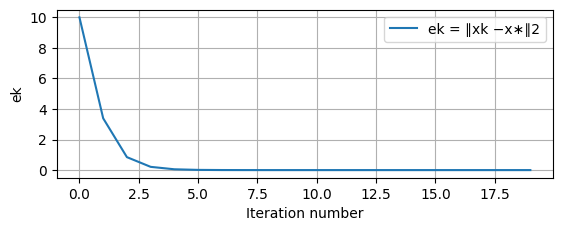

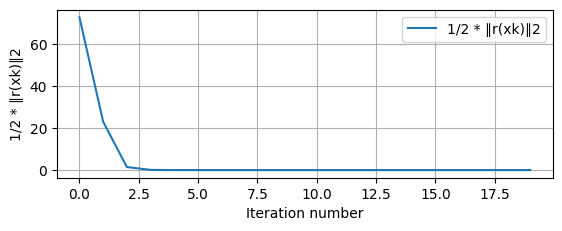

In [89]:
# Calculate ek
ek = np.linalg.norm(stats["X"] - x_star, axis=1)**2

# Plot ek as a function of the iteration number
plt.subplot(2,1,1)
plt.plot(np.arange(0,stats["iter"]+1), ek, label='ek = ∥xk −x∗∥2')
plt.xlabel('Iteration number')
plt.ylabel('ek')
plt.legend()
plt.grid(True)
plt.show()

# Calculate 1/2 * ∥r(xk)∥2
half_norm_r = 0.5 * np.linalg.norm(stats["R"], axis=1)**2

# Plot 1/2 * ∥r(xk)∥2 as a function of the iteration number
plt.subplot(2,1,2)
plt.plot(np.arange(0,stats["iter"]+1), half_norm_r, label='1/2 * ∥r(xk)∥2')
plt.xlabel('Iteration number')
plt.ylabel('1/2 * ∥r(xk)∥2')
plt.legend()
plt.grid(True)
plt.show()

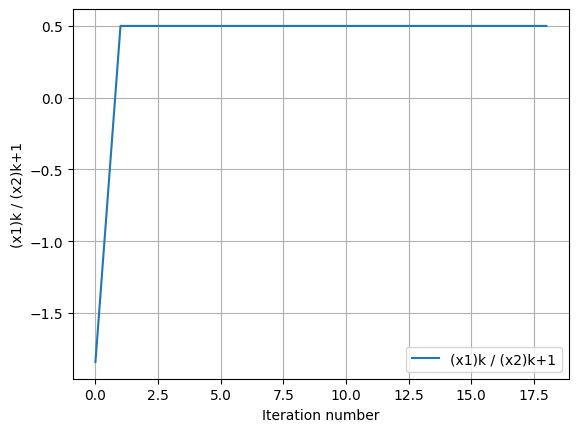

In [90]:
x = stats['X']
x_1 = [row[0] for row in x]
x_2 = [row[1] for row in x]
ratios_x2 = [x_2[i+1]/x_2[i] for i in range(len(x_2)-1)]
# Plot the ratios as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,len(ratios_x2)), ratios_x2, label='(x1)k / (x2)k+1')
plt.xlabel('Iteration number')
plt.ylabel('(x1)k / (x2)k+1')
plt.legend()
plt.grid(True)  # Add grid
plt.show()


In [91]:
convergence_rate = stats["iter"] / alpha
print('Convergence rate =', convergence_rate)

Convergence rate = 19.0


# 5. Gauss-Newton method

In [92]:
x0 = [3,1]
flag_line = 1
x_star, stats = GaussNewton_line_md(fun_rJ_exe, x0, flag_line)

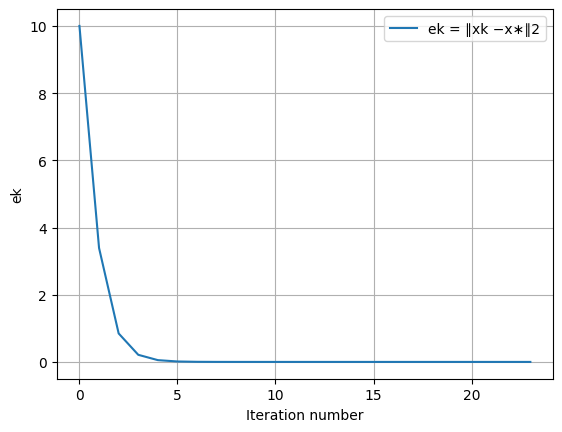

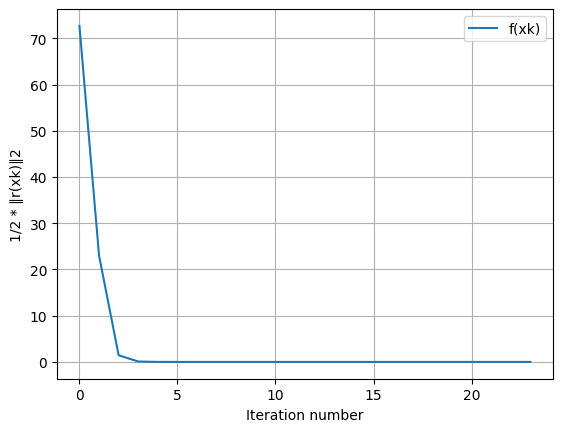

In [93]:
# Calculate ek
ek = np.linalg.norm(stats["X"] - x_star, axis=1)**2

# Plot ek as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,stats["iter"]+1), ek, label='ek = ∥xk −x∗∥2')
plt.xlabel('Iteration number')
plt.ylabel('ek')
plt.legend()
plt.grid(True)
plt.show()


half_norm_r=stats['F']
# Plotf(xk) as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,stats["iter"]+1), half_norm_r, label='f(xk)')
plt.xlabel('Iteration number')
plt.ylabel('1/2 * ∥r(xk)∥2')
plt.legend()
plt.grid(True)
plt.show()

# Levenberg-Marquardt method

## Implementation Week 7


In [94]:
x_star, stats = Levenberg_Marquardt(fun_rJ_exe, x0)


In [95]:
'''# Calculate ek
ek = np.linalg.norm(stats["X"] - x_star, axis=1)**2

#Calculate ratios 
ratios = np.linalg.norm(stats["X"][1:, :] - x_star, axis=1)**2 / np.linalg.norm(stats["X"][:-1, :] - x_star, axis=1)**2


# Plot ek as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,stats["iter"]+1), ek, label='ek = ∥xk −x∗∥2')
plt.xlabel('Iteration number')
plt.ylabel('ek')
plt.legend()
plt.grid(True)
plt.show()


half_norm_r=stats['F']
# Plot 1/2 * ∥r(xk)∥2 as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,stats["iter"]+1), half_norm_r, label='1/2 * ∥r(xk)∥2')
plt.xlabel('Iteration number')
plt.ylabel('1/2 * ∥r(xk)∥2')
plt.legend()
plt.grid(True)
plt.show()


# Plot the ratios as a function of the iteration number
plt.figure()
plt.plot(np.arange(0, stats["iter"]), ratios, label='∥xk+1 −x∗∥2/∥xk − x∗∥2')
plt.xlabel('Iteration number')
plt.ylabel('(x1)k / (x2)k+1')
plt.legend()
plt.grid(True)  # Add grid
plt.show()
'''

'# Calculate ek\nek = np.linalg.norm(stats["X"] - x_star, axis=1)**2\n\n#Calculate ratios \nratios = np.linalg.norm(stats["X"][1:, :] - x_star, axis=1)**2 / np.linalg.norm(stats["X"][:-1, :] - x_star, axis=1)**2\n\n\n# Plot ek as a function of the iteration number\nplt.figure()\nplt.plot(np.arange(0,stats["iter"]+1), ek, label=\'ek = ∥xk −x∗∥2\')\nplt.xlabel(\'Iteration number\')\nplt.ylabel(\'ek\')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n\nhalf_norm_r=stats[\'F\']\n# Plot 1/2 * ∥r(xk)∥2 as a function of the iteration number\nplt.figure()\nplt.plot(np.arange(0,stats["iter"]+1), half_norm_r, label=\'1/2 * ∥r(xk)∥2\')\nplt.xlabel(\'Iteration number\')\nplt.ylabel(\'1/2 * ∥r(xk)∥2\')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n\n# Plot the ratios as a function of the iteration number\nplt.figure()\nplt.plot(np.arange(0, stats["iter"]), ratios, label=\'∥xk+1 −x∗∥2/∥xk − x∗∥2\')\nplt.xlabel(\'Iteration number\')\nplt.ylabel(\'(x1)k / (x2)k+1\')\nplt.legend()\nplt.grid(True)  # Add gri

I don't know why is not converging, so I commented for not having an error in the plot

## Levenberg-Marquardt_yq

In [96]:
tau = 1
x_star, stats = Levenberg_Marquardt_yq(fun_rJ_exe, x0,tau)

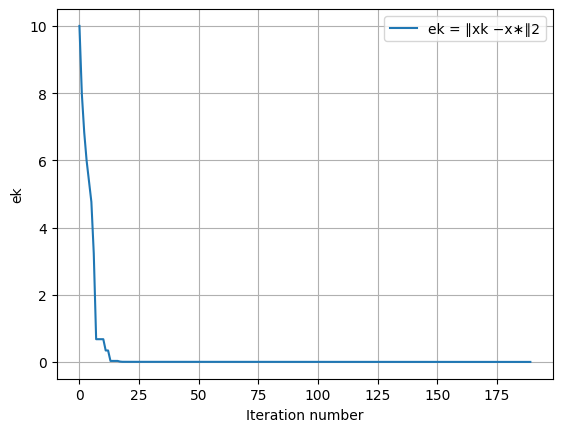

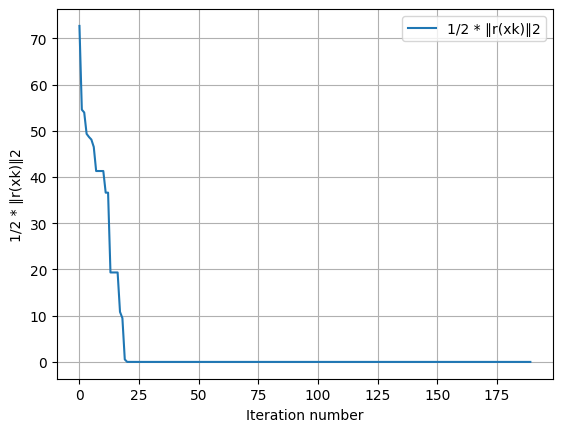

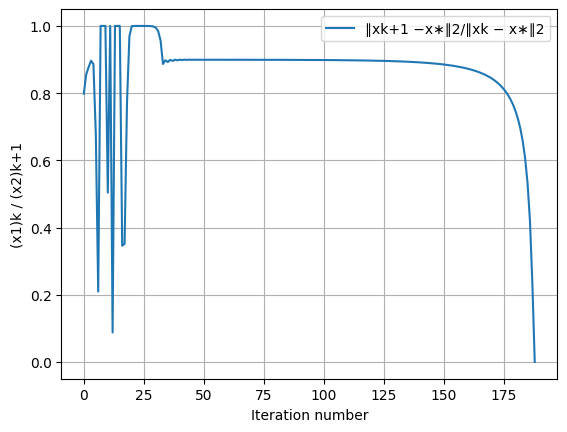

In [97]:
# Calculate ek
ek = np.linalg.norm(stats["X"] - x_star, axis=1)**2

#Calculate ratios 
ratios = np.linalg.norm(stats["X"][1:, :] - x_star, axis=1)**2 / np.linalg.norm(stats["X"][:-1, :] - x_star, axis=1)**2


# Plot ek as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,stats["iter"]+1), ek, label='ek = ∥xk −x∗∥2')
plt.xlabel('Iteration number')
plt.ylabel('ek')
plt.legend()
plt.grid(True)
plt.show()


half_norm_r=stats['F']
# Plot 1/2 * ∥r(xk)∥2 as a function of the iteration number
plt.figure()
plt.plot(np.arange(0,stats["iter"]+1), half_norm_r, label='1/2 * ∥r(xk)∥2')
plt.xlabel('Iteration number')
plt.ylabel('1/2 * ∥r(xk)∥2')
plt.legend()
plt.grid(True)
plt.show()


# Plot the ratios as a function of the iteration number
plt.figure()
plt.plot(np.arange(0, stats["iter"]), ratios, label='∥xk+1 −x∗∥2/∥xk − x∗∥2')
plt.xlabel('Iteration number')
plt.ylabel('(x1)k / (x2)k+1')
plt.legend()
plt.grid(True)  # Add grid
plt.show()